# 2

##  提升集成算法：重要参数n_estimators

In [0]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [0]:
data = load_boston()
#波士顿数据集非常简单，但它所涉及到的问题却很多

In [3]:
data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
X = data.data
y = data.target

In [5]:
X.shape

(506, 13)

In [6]:
y.shape

(506,)

In [7]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [0]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [0]:
reg = XGBR(n_estimators=100).fit(Xtrain,Ytrain) #训练

In [10]:
reg.predict(Xtest) #传统接口predict

array([ 8.165384 , 21.919355 , 29.843645 , 11.874415 ,  8.833874 ,
       20.698246 , 15.456877 , 15.544203 , 15.273806 , 13.444421 ,
       22.130966 , 35.072395 , 21.383947 , 27.477697 , 20.449163 ,
       10.434615 , 19.13851  , 24.973454 , 23.284975 , 23.22411  ,
       17.86431  , 17.218367 , 25.284815 , 20.962675 , 20.506361 ,
       16.18782  , 21.71437  , 31.687273 , 22.739857 , 15.976351 ,
       37.61867  , 20.701538 , 21.191647 , 23.53703  , 23.374733 ,
       24.682228 , 16.27922  , 24.404453 , 16.918646 , 34.06889  ,
       18.060398 , 21.352114 , 37.74781  , 17.90909  , 14.035863 ,
       28.243176 , 46.44803  , 14.748789 , 10.719417 , 35.26486  ,
       25.46181  , 21.976503 , 20.583235 , 49.3701   , 26.799538 ,
       26.286161 , 17.937538 , 20.566235 , 16.813719 , 18.816374 ,
       14.940857 , 22.213655 , 19.239632 , 30.246548 , 27.522081 ,
       18.951006 , 19.352182 , 15.716684 , 22.732222 , 19.14629  ,
       29.943521 , 43.593327 , 29.910528 , 22.987352 , 20.6698

In [11]:
reg.score(Xtest,Ytest) #你能想出这里应该返回什么模型评估指标么？

0.9197580267581366

In [12]:
y.mean()

22.532806324110677

In [13]:
MSE(Ytest,reg.predict(Xtest))

7.466827353555599

In [0]:
reg.feature_importances_ #树模型的优势之一：能够查看模型的重要性分数，可以使用嵌入法(SelectFromModel)进行特征选择

array([0.13862929, 0.0046729 , 0.02803738, 0.00623053, 0.08411215,
       0.16510904, 0.08566978, 0.15109034, 0.03271028, 0.0623053 ,
       0.06074766, 0.07632399, 0.10436137], dtype=float32)

In [0]:
reg = XGBR(n_estimators=100) #交叉验证中导入的没有经过训练的模型

In [0]:
CVS(reg,Xtrain,Ytrain,cv=5).mean()
#这里应该返回什么模型评估指标，还记得么？

0.8017863029875325

In [0]:
#严谨的交叉验证与不严谨的交叉验证之间的讨论：训练集 or 全数据？
CVS(reg,Xtrain,Ytrain,cv=5)

array([0.83340801, 0.77096033, 0.83473392, 0.80424149, 0.76558778])

In [0]:
#严谨 vs 不严谨

In [0]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.041115480238048

In [0]:
#来查看一下sklearn中所有的模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [0]:
#使用随机森林和线性回归进行一个对比
rfr = RFR(n_estimators=100)
CVS(rfr,Xtrain,Ytrain,cv=5).mean()

0.8040718641989123

In [0]:
CVS(rfr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.704096825231385

In [0]:
lr = LinearR()
CVS(lr,Xtrain,Ytrain,cv=5).mean()

0.6835070597278082

In [0]:
CVS(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-25.349507493648453

In [0]:
#如果开启参数slient：在数据巨大，预料到算法运行会非常缓慢的时候可以使用这个参数来监控模型的训练进度
reg = XGBR(n_estimators=10,silent=False)

In [17]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-92.67865836936579

In [0]:
def plot_learning_curve(estimator,title, X, y, 
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            ,random_state=420
                                                            ,n_jobs=n_jobs) 
    print(train_sizes)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [0]:
cv = KFold(n_splits=5, shuffle = True, random_state=42) #交叉验证模式

In [19]:
Xtrain.shape

(354, 13)

[ 28  91 155 219 283]


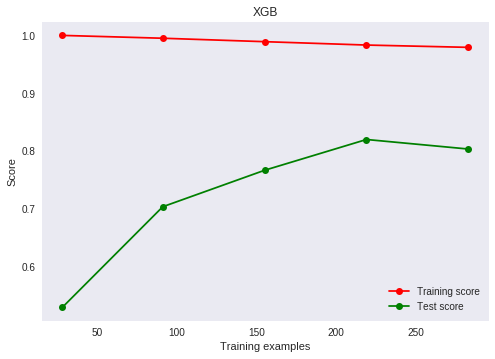

In [20]:
plot_learning_curve(XGBR(n_estimators=100,random_state=420)
                    ,"XGB",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()

660 0.8046775284172915


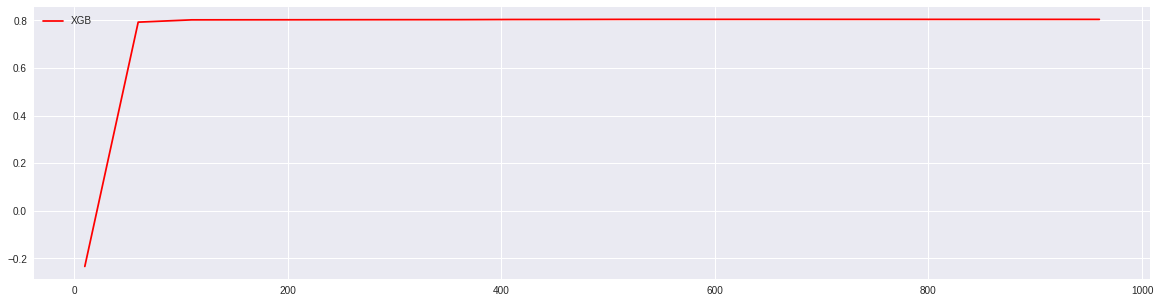

In [21]:
#=====【TIME WARNING：25 seconds】=====#

axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

In [0]:
#选出来的n_estimators非常不寻常，我们是否要选择准确率最高的n_estimators值呢？

### 进化的学习曲线：方差与泛化误差

650 0.80476050359201 0.01053673846018678
50 0.7857724708830981 0.009072727885598212
150 0.8032842414878519 0.009747694343514357 0.04844478399052411


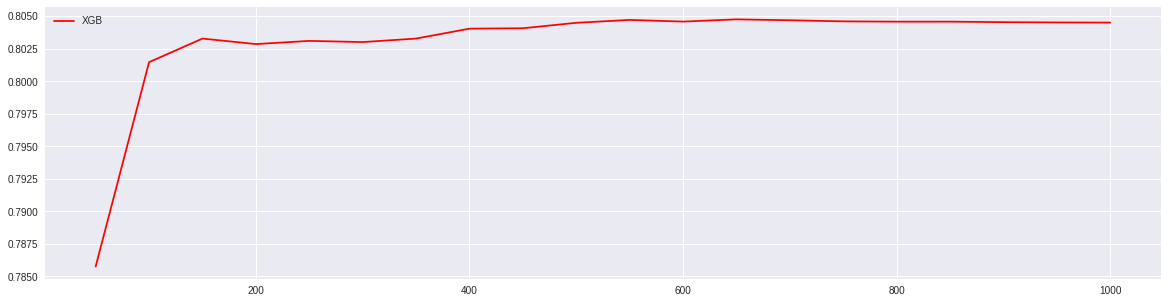

In [0]:
#======【TIME WARNING: 20s】=======#
axisx = range(50,1050,50)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2+cvresult.var())
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

180 0.8038787848970184 0.00959321570484315
180 0.8038787848970184 0.00959321570484315
180 0.8038787848970184 0.00959321570484315 0.04805674671831314


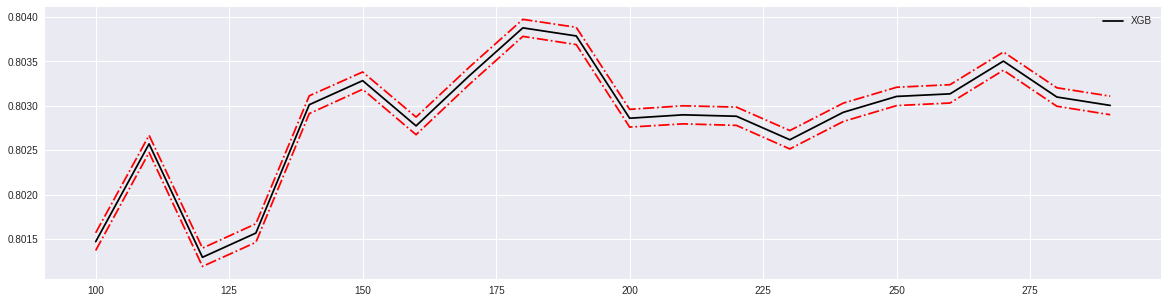

In [0]:
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
#添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

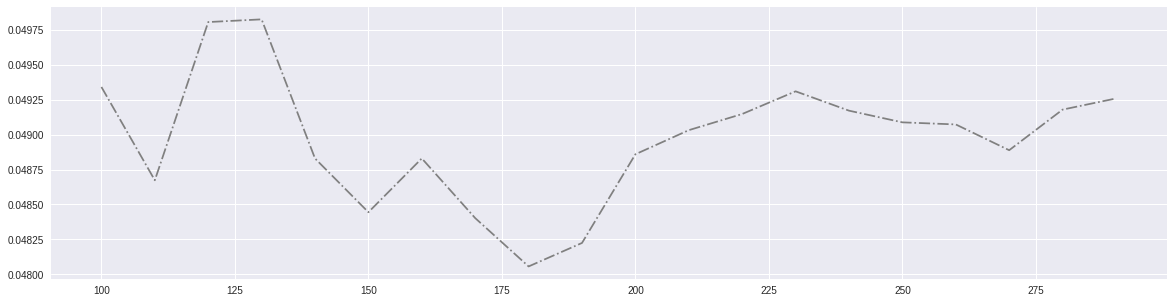

In [0]:
#看看泛化误差的可控部分如何？
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()

In [0]:
#验证模型效果是否提高了？
time0 = time()
print(XGBR(n_estimators=100,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9197580267581366
0.03966712951660156


In [0]:
time0 = time()
print(XGBR(n_estimators=660,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9208745746309475
0.19384145736694336


In [0]:
time0 = time()
print(XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9231068620728082
0.05786609649658203


## 有放回随机抽样：重要参数subsample

0.5263157894736842 0.8356103920206508


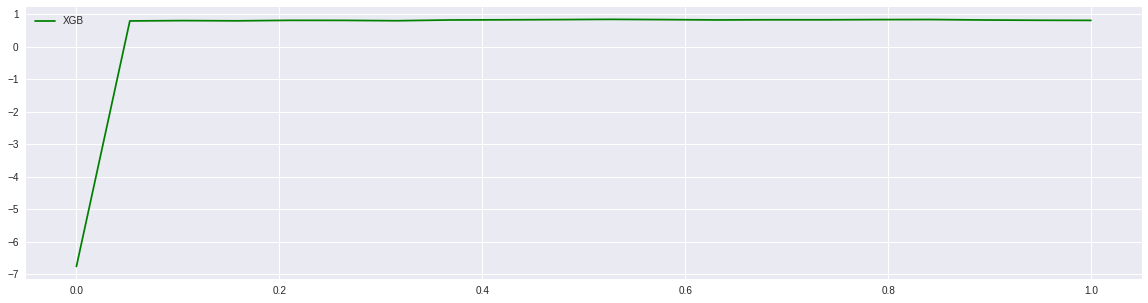

In [0]:
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

0.5499999999999999 0.8373036973488803 0.004472634200958534
0.7999999999999999 0.8336086297533647 0.004388753745658516
0.5499999999999999 0.8373036973488803 0.004472634200958534 0.030942721097303266


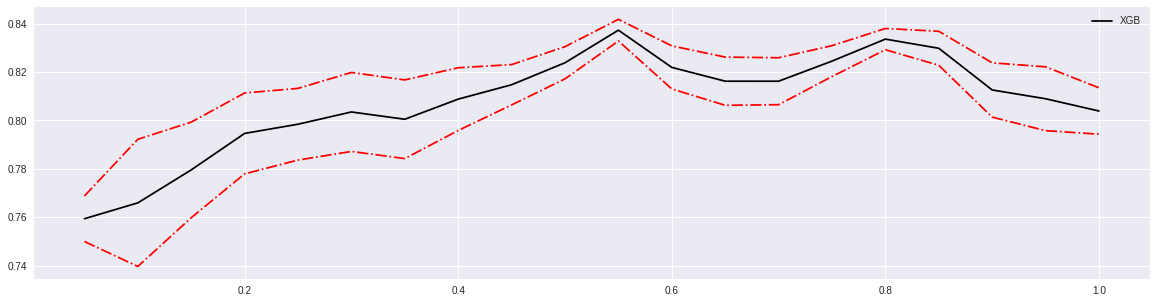

In [0]:
#继续细化学习曲线
axisx = np.linspace(0.05,1,20)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

0.8020833333333334 0.8352429067739564 0.003950440531134253
0.8020833333333334 0.8352429067739564 0.003950440531134253
0.8020833333333334 0.8352429067739564 0.003950440531134253 0.031095340299429473


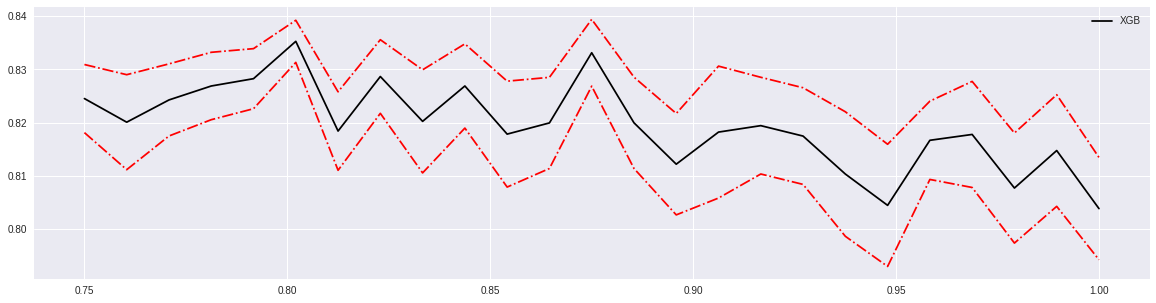

In [0]:
#细化学习曲线
axisx = np.linspace(0.75,1,25)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [0]:
reg = XGBR(n_estimators=180
#           ,subsample=0.7708333333333334
           ,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.9231068620728082

In [0]:
MSE(Ytest,reg.predict(Xtest))

7.155205217161047

## 迭代决策树：重要参数eta

In [0]:
#首先我们先来定义一个评分函数，这个评分函数能够帮助我们直接打印Xtrain上的交叉验证结果
def regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i] #模型评估指标的名字
                                     ,CVS(reg
                                          ,Xtrain,Ytrain
                                          ,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [0]:
reg = XGBR(n_estimators=180,random_state=420)

In [24]:
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])

r2:0.80
neg_mean_squared_error:-13.48


[0.8038787848970184, -13.482301822063182]

In [25]:
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)

[0.8038787848970184, -13.482301822063182]

In [26]:
from time import time
import datetime

for i in [0,0.2,0.5,1]:
    time0=time()
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    print("learning_rate = {}".format(i))
    regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning_rate = 0
r2:-6.76
neg_mean_squared_error:-567.55
00:00:889485
	
learning_rate = 0.2
r2:0.81
neg_mean_squared_error:-13.32
00:00:865498
	
learning_rate = 0.5
r2:0.81
neg_mean_squared_error:-13.24
00:00:883588
	
learning_rate = 1
r2:0.72
neg_mean_squared_error:-19.11
00:00:897876
	


0.55 0.8125604372670463


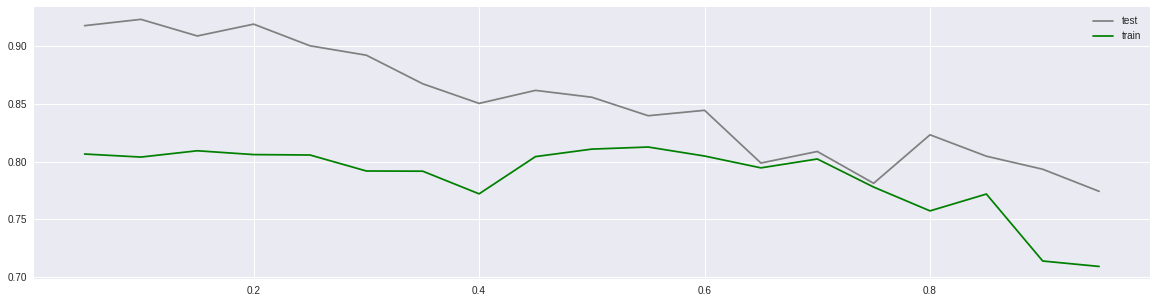

In [27]:
axisx = np.arange(0.05,1,0.05)
rs = []
te = []
for i in axisx:
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    score = regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)
    test = reg.fit(Xtrain,Ytrain).score(Xtest,Ytest)
    rs.append(score[0])
    te.append(test)
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,te,c="gray",label="test")
plt.plot(axisx,rs,c="green",label="train")
plt.legend()
plt.show()

# 3 XGBoost的智慧

In [28]:
for booster in ["gbtree","gblinear","dart"]:
    reg = XGBR(n_estimators=180
               ,learning_rate=0.1
               ,random_state=420
               ,booster=booster).fit(Xtrain,Ytrain)
    print(booster)
    print(reg.score(Xtest,Ytest))

gbtree
0.9231068620728082
gblinear
0.6566081977043557
dart
0.923106843149575


In [29]:
#默认reg:linear
reg = XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest, Ytest)

0.9231068620728082

In [30]:
MSE(Ytest,reg.predict(Xtest))

7.155205217161047

In [0]:
#xgb实现法
import xgboost as xgb

In [0]:
#使用类DMatrix读取数据
dtrain = xgb.DMatrix(Xtrain,Ytrain) #特征矩阵和标签都进行一个传入
dtest = xgb.DMatrix(Xtest,Ytest)

In [33]:
#非常遗憾无法打开来查看，所以通常都是先读到pandas里面查看之后再放到DMatrix中
dtrain

In [0]:
import pandas as pd

In [0]:
pd.DataFrame(Xtrain)

In [0]:
#写明参数
param = {'silent':True #默认为False，通常要手动把它关闭掉
         ,'objective':'reg:linear'
         ,"eta":0.1}
num_round = 180 #n_estimators

In [0]:
#类train，可以直接导入的参数是训练数据，树的数量，其他参数都需要通过params来导入
bst = xgb.train(param, dtrain, num_round)

In [0]:
#接口predict
preds = bst.predict(dtest)

## 测试错误的数据格式

In [39]:
d1 = xgb.DMatrix(Xtrain)
bst1 = xgb.train(param, d1, num_round)

XGBoostError: ignored

In [40]:
preds

array([ 6.4613175, 22.123888 , 30.755163 , 13.424351 ,  8.378565 ,
       23.608477 , 14.2151165, 16.026499 , 15.498961 , 14.10649  ,
       24.030867 , 34.36362  , 21.461111 , 28.839497 , 19.568035 ,
       10.188658 , 19.42369  , 23.539951 , 22.850523 , 23.198708 ,
       17.82486  , 16.07219  , 27.602034 , 20.773046 , 20.868807 ,
       15.865789 , 22.076588 , 29.292158 , 22.841051 , 15.770392 ,
       36.680496 , 21.057947 , 20.137005 , 23.777853 , 22.70615  ,
       23.863268 , 15.595315 , 24.565872 , 17.720552 , 33.95111  ,
       18.784286 , 20.483374 , 37.10668  , 18.068268 , 12.73839  ,
       31.186407 , 45.895035 , 12.696718 , 10.773068 , 36.064293 ,
       26.262571 , 19.908836 , 20.715096 , 48.814903 , 27.550056 ,
       25.225826 , 17.15366  , 21.215551 , 17.426773 , 18.478971 ,
       14.6453705, 22.841473 , 18.869593 , 29.990978 , 29.933191 ,
       18.756853 , 18.784918 , 16.33361  , 23.155968 , 19.144344 ,
       29.724382 , 42.121906 , 31.544363 , 23.017508 , 19.5360

In [41]:
from sklearn.metrics import r2_score
r2_score(Ytest,preds)

0.9260984298390122

In [42]:
MSE(Ytest,preds)

6.87682821415069

##  让树停止生长：重要参数gamma

In [0]:
import xgboost as xgb

#为了便捷，使用全数据
dfull = xgb.DMatrix(X,y)

In [0]:
#设定参数
param1 = {'silent':True,'obj':'reg:linear',"gamma":0}
num_round = 100
n_fold=5 #sklearn - KFold

In [45]:
#使用类xgb.cv
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:347619


In [46]:
#看看类xgb.cv生成了什么结果？
cvresult1 #随着树不断增加，我们的模型的效果如何变化

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,17.163215,0.584296,17.105578,0.129116
1,12.519736,0.473458,12.337973,0.097557
2,9.404534,0.472310,8.994071,0.065756
3,7.250335,0.500342,6.629481,0.050323
4,5.920812,0.591874,4.954406,0.033209
5,5.045190,0.687971,3.781454,0.029604
6,4.472030,0.686492,2.947767,0.038786
7,4.179314,0.737935,2.357748,0.042040
8,3.979878,0.798198,1.951907,0.044972
9,3.870751,0.812331,1.660895,0.044894


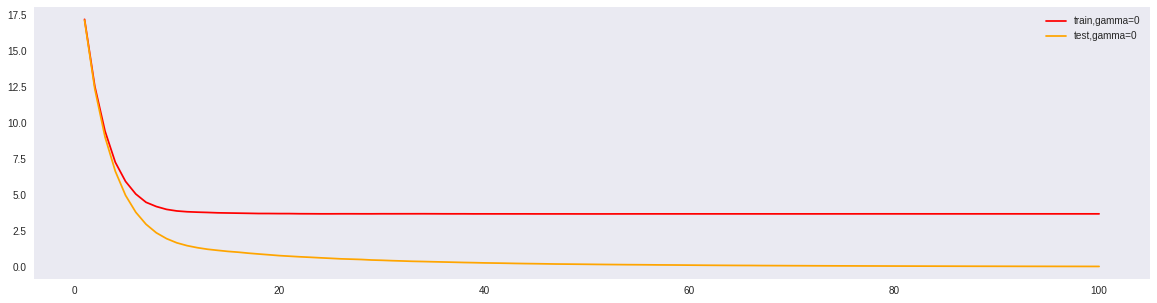

In [47]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

#从这个图中，我们可以看出什么？
#怎样从图中观察模型的泛化能力？
#从这个图的角度来说，模型的调参目标是什么？

In [0]:
#xgboost中回归模型的默认模型评估指标是什么？

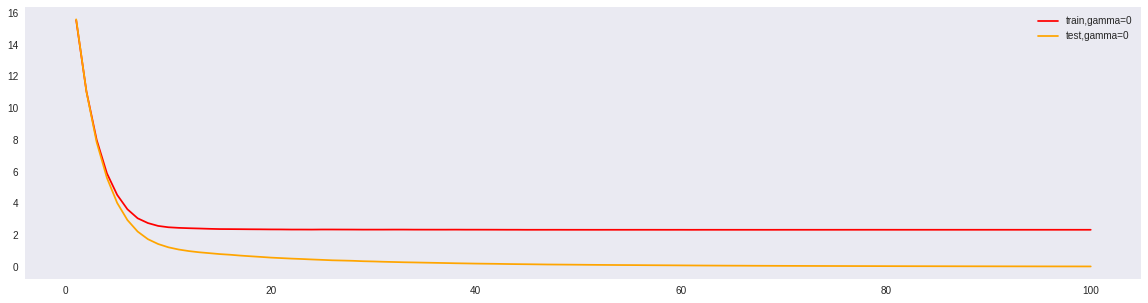

In [49]:
param1 = {'silent':True,'obj':'reg:linear',"gamma":0,"eval_metric":"mae"}
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

In [50]:
param1 = {'silent':True,'obj':'reg:linear',"gamma":0}
param2 = {'silent':True,'obj':'reg:linear',"gamma":20}
num_round = 180
n_fold=5

time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:596644


In [51]:
time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:610645


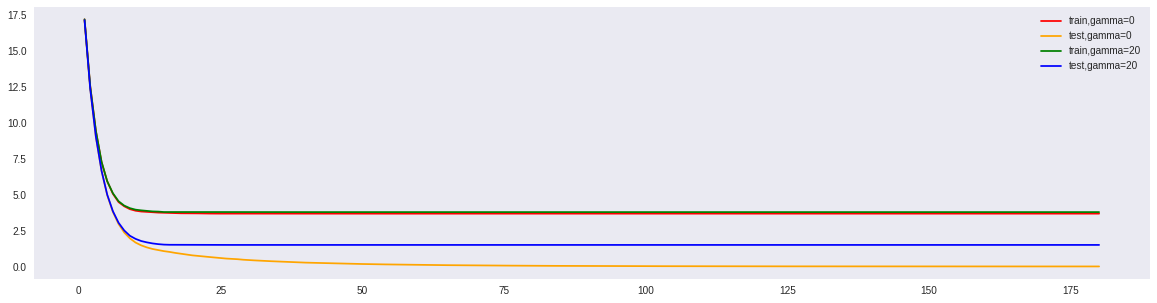

In [52]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,181),cvresult2.iloc[:,0],c="green",label="train,gamma=20")
plt.plot(range(1,181),cvresult2.iloc[:,2],c="blue",label="test,gamma=20")
plt.legend()
plt.show()

#从这里，你看出gamma是如何控制过拟合了吗？控制训练集上的训练 - 降低训练集上的表现

试一个分类的例子

In [0]:
from sklearn.datasets import load_breast_cancer
data2 = load_breast_cancer()

x2 = data2.data
y2 = data2.target

dfull2 = xgb.DMatrix(x2,y2)

param1 = {'silent':True,'obj':'binary:logistic',"gamma":0,"nfold":5}
param2 = {'silent':True,'obj':'binary:logistic',"gamma":1,"nfold":5}
num_round = 100

In [54]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull2, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:276067


In [55]:
time0 = time()
cvresult2 = xgb.cv(param2, dfull2, num_round) 
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:473792


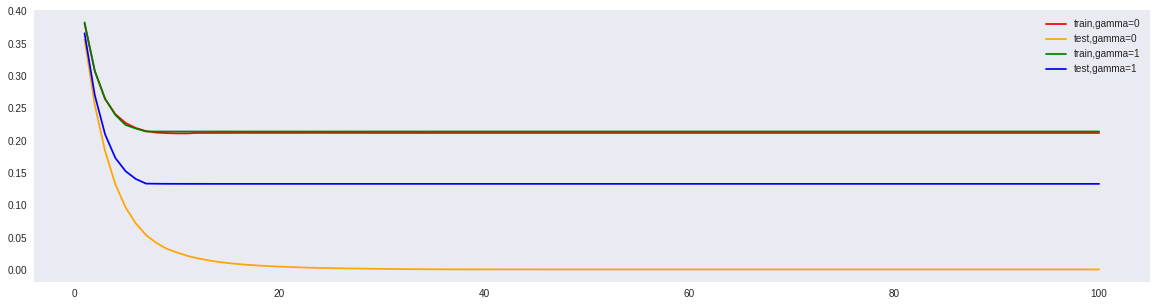

In [56]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,101),cvresult2.iloc[:,0],c="green",label="train,gamma=1")
plt.plot(range(1,101),cvresult2.iloc[:,2],c="blue",label="test,gamma=1")
plt.legend()
plt.show()

# 4 XGBoost应用中的其他问题

## 1 过拟合：剪枝参数与回归模型调参

In [0]:
dfull = xgb.DMatrix(X,y)

param1 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"nfold":5}
num_round = 200

00:00:321163


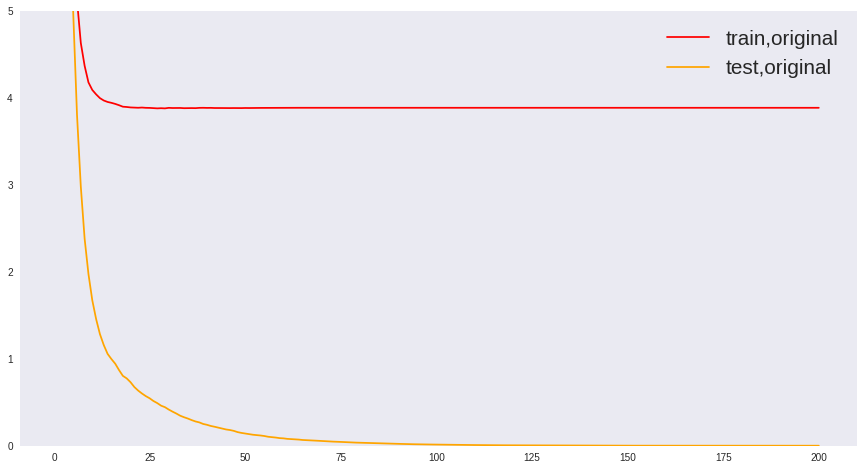

In [58]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize="xx-large")
plt.show()

00:00:334137
00:00:144793
00:00:184795


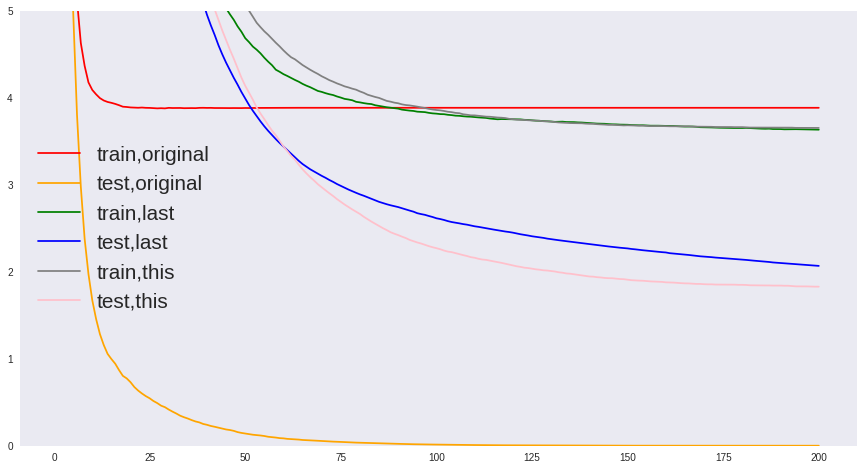

In [59]:
param1 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"nfold":5}
num_round = 200

time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")

param2 = {'silent':True
          ,'obj':'reg:linear'
          ,"max_depth":2
          ,"eta":0.05
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":0.4
          ,"colsample_bynode":1
          ,"nfold":5}

param3 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"eta":0.05
          ,"gamma":20
          ,"lambda":3.5
          ,"alpha":0.2
          ,"max_depth":4
          ,"colsample_bytree":0.4
          ,"colsample_bylevel":0.6
          ,"colsample_bynode":1
          ,"nfold":5}

time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cvresult3 = xgb.cv(param3, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

ax.plot(range(1,201),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,201),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,201),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()

## 2 XGBoost模型的保存和调用

### 使用Pickle保存和调用模型

In [0]:
import pickle

In [0]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)

#设定参数，对模型进行训练
param = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"eta":0.05
          ,"gamma":20
          ,"lambda":3.5
          ,"alpha":0.2
          ,"max_depth":4
          ,"colsample_bytree":0.4
          ,"colsample_bylevel":0.6
          ,"colsample_bynode":1}
num_round = 180

bst = xgb.train(param, dtrain, num_round)

In [0]:
#保存模型
pickle.dump(bst, open("xgboostonboston.dat","wb"))

#注意，open中我们往往使用w或者r作为读取的模式，但其实w与r只能用于文本文件 - txt
#当我们希望导入的不是文本文件，而是模型本身的时候，我们使用"wb"和"rb"作为读取的模式
#其中wb表示以二进制写入，rb表示以二进制读入，使用open进行保存的这个文件中是一个可以进行读取或者调用的模型

In [63]:
#看看模型被保存到了哪里？
import sys
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [0]:
#重新打开jupyter lab

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pickle
import xgboost as xgb

data = load_boston()

X = data.data
y = data.target

Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [0]:
#注意，如果我们保存的模型是xgboost库中建立的模型，则导入的数据类型也必须是xgboost库中的数据类型
dtest = xgb.DMatrix(Xtest,Ytest)

In [66]:
#导入模型
loaded_model = pickle.load(open("xgboostonboston.dat", "rb"))
print("Loaded model from: xgboostonboston.dat")

Loaded model from: xgboostonboston.dat


In [0]:
#做预测，直接调用接口predict
ypreds = loaded_model.predict(dtest)

In [68]:
ypreds

array([ 8.796627 , 22.251627 , 29.463833 , 13.552206 ,  9.749415 ,
       21.718597 , 15.428588 , 15.765638 , 16.23822  , 15.386694 ,
       21.821184 , 35.972435 , 20.940928 , 30.260195 , 21.311058 ,
       11.721132 , 21.283613 , 27.035889 , 25.570278 , 23.767391 ,
       17.878729 , 16.17358  , 25.787714 , 22.070162 , 19.809326 ,
       16.368736 , 22.975214 , 23.519804 , 23.280918 , 16.69544  ,
       35.166664 , 20.457819 , 20.176447 , 23.672691 , 23.454966 ,
       25.159687 , 16.155891 , 24.84578  , 18.094835 , 34.196056 ,
       18.00448  , 20.653    , 35.82867  , 19.253775 , 15.19614  ,
       27.488487 , 42.640575 , 14.962704 , 10.649249 , 37.515667 ,
       25.812563 , 20.99281  , 20.339155 , 46.622208 , 27.54994  ,
       25.598074 , 18.92313  , 20.27878  , 18.078022 , 18.10919  ,
       15.38769  , 24.090042 , 18.959557 , 32.263603 , 28.549206 ,
       19.746824 , 21.575943 , 17.493204 , 22.469473 , 16.78368  ,
       28.558378 , 39.192738 , 30.741638 , 23.411602 , 20.2607

In [69]:
from sklearn.metrics import mean_squared_error as MSE, r2_score
MSE(Ytest,ypreds)

9.687680910474723

In [70]:
r2_score(Ytest,ypreds)

0.8958917093450866

### 使用Joblib保存和调用模型

In [0]:
bst = xgb.train(param, dtrain, num_round)

In [72]:
import joblib

#同样可以看看模型被保存到了哪里
joblib.dump(bst,"xgboost-boston.dat")

['xgboost-boston.dat']

In [0]:
loaded_model = joblib.load("xgboost-boston.dat")

In [0]:
dtest = xgb.DMatrix(Xtest,Ytest)
ypreds = loaded_model.predict(dtest)

In [75]:
ypreds

array([ 8.796627 , 22.251627 , 29.463833 , 13.552206 ,  9.749415 ,
       21.718597 , 15.428588 , 15.765638 , 16.23822  , 15.386694 ,
       21.821184 , 35.972435 , 20.940928 , 30.260195 , 21.311058 ,
       11.721132 , 21.283613 , 27.035889 , 25.570278 , 23.767391 ,
       17.878729 , 16.17358  , 25.787714 , 22.070162 , 19.809326 ,
       16.368736 , 22.975214 , 23.519804 , 23.280918 , 16.69544  ,
       35.166664 , 20.457819 , 20.176447 , 23.672691 , 23.454966 ,
       25.159687 , 16.155891 , 24.84578  , 18.094835 , 34.196056 ,
       18.00448  , 20.653    , 35.82867  , 19.253775 , 15.19614  ,
       27.488487 , 42.640575 , 14.962704 , 10.649249 , 37.515667 ,
       25.812563 , 20.99281  , 20.339155 , 46.622208 , 27.54994  ,
       25.598074 , 18.92313  , 20.27878  , 18.078022 , 18.10919  ,
       15.38769  , 24.090042 , 18.959557 , 32.263603 , 28.549206 ,
       19.746824 , 21.575943 , 17.493204 , 22.469473 , 16.78368  ,
       28.558378 , 39.192738 , 30.741638 , 23.411602 , 20.2607

In [76]:
MSE(Ytest, ypreds)

9.687680910474723

In [77]:
r2_score(Ytest,ypreds)

0.8958917093450866

In [0]:
#使用sklearn中的模型
from xgboost import XGBRegressor as XGBR

bst = XGBR(n_estimators=200
           ,eta=0.05,gamma=20
           ,reg_lambda=3.5
           ,reg_alpha=0.2
           ,max_depth=4
           ,colsample_bytree=0.4
           ,colsample_bylevel=0.6).fit(Xtrain,Ytrain) #训练完毕

In [79]:
joblib.dump(bst,"xgboost-boston-sklearn.dat")

['xgboost-boston-sklearn.dat']

In [0]:
loaded_model = joblib.load("xgboost-boston-sklearn.dat")

In [0]:
#则这里可以直接导入Xtest,直接是我们的numpy
ypreds = loaded_model.predict(Xtest)

In [0]:
Xtest

array([[4.15292e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.29460e+02, 2.73800e+01],
       [2.73100e-02, 0.00000e+00, 7.07000e+00, ..., 1.78000e+01,
        3.96900e+02, 9.14000e+00],
       [3.15000e-02, 9.50000e+01, 1.47000e+00, ..., 1.70000e+01,
        3.96900e+02, 4.56000e+00],
       ...,
       [5.08300e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.89710e+02, 5.68000e+00],
       [3.77498e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.20100e+01, 1.71500e+01],
       [1.96091e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.34400e+01]])

In [0]:
dtest

In [82]:
ypreds

array([ 9.370206 , 23.062994 , 29.085371 , 13.11144  ,  9.3538475,
       22.259153 , 16.031366 , 15.605875 , 15.955183 , 15.79971  ,
       22.947327 , 35.25754  , 20.989542 , 29.958952 , 21.836102 ,
       11.539962 , 21.198475 , 24.981768 , 24.80271  , 23.974459 ,
       17.182869 , 16.271545 , 25.684208 , 21.692862 , 19.898388 ,
       16.186777 , 22.40797  , 25.815397 , 23.518883 , 17.929146 ,
       35.61698  , 20.399681 , 20.397526 , 24.013855 , 22.593496 ,
       24.140965 , 15.611827 , 23.991482 , 18.168013 , 35.157097 ,
       17.10456  , 20.556757 , 34.535564 , 18.753372 , 15.395048 ,
       29.785215 , 45.40446  , 19.041388 , 10.453054 , 37.60364  ,
       25.415462 , 20.995129 , 20.675165 , 46.56558  , 28.193459 ,
       26.096367 , 18.925188 , 20.633738 , 18.054153 , 19.032524 ,
       14.844367 , 22.616034 , 19.82583  , 31.420166 , 29.925508 ,
       19.926214 , 20.403868 , 16.70398  , 22.773792 , 17.528723 ,
       28.27874  , 41.765095 , 29.346258 , 23.660807 , 19.7279

In [83]:
MSE(Ytest, ypreds)

9.130310409443075

In [84]:
r2_score(Ytest,ypreds)

0.9018814700174407

## 3分类案例：XGB中的样本不均衡问题

In [0]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as XGBC
from sklearn.datasets import make_blobs #自创数据集
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc

In [0]:
class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [87]:
X.shape

(550, 2)

In [88]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [89]:
(y == 1).sum() / y.shape[0] #9%

0.09090909090909091

###  在数据集上建模：sklearn模式

In [0]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [0]:
#在sklearn下建模#

clf = XGBC().fit(Xtrain,Ytrain)
ypred = clf.predict(Xtest)

In [92]:
ypred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [93]:
clf.score(Xtest,Ytest) #默认模型评估指标 - 准确率

0.9272727272727272

In [94]:
cm(Ytest,ypred,labels=[1,0]) #少数类写在前面

array([[  9,   4],
       [  8, 144]])

In [95]:
recall(Ytest,ypred)

0.6923076923076923

In [96]:
auc(Ytest,clf.predict_proba(Xtest)[:,1])

0.9671052631578947

In [0]:
#负/正样本比例
clf_ = XGBC(scale_pos_weight=10).fit(Xtrain,Ytrain)
ypred_ = clf_.predict(Xtest)

In [100]:
clf_.score(Xtest,Ytest)



0.9515151515151515

In [101]:
cm(Ytest,ypred_,labels=[1,0])

array([[ 13,   0],
       [  8, 144]])

In [102]:
recall(Ytest,ypred_)

1.0

In [103]:
auc(Ytest,clf_.predict_proba(Xtest)[:,1])

0.9696356275303644

In [98]:
#随着样本权重逐渐增加，模型的recall,auc和准确率如何变化？
for i in [1,5,10,20,30]:
    clf_ = XGBC(scale_pos_weight=i).fit(Xtrain,Ytrain)
    ypred_ = clf_.predict(Xtest)
    print(i)
    print("\tAccuracy:{}".format(clf_.score(Xtest,Ytest)))
    print("\tRecall:{}".format(recall(Ytest,ypred_)))
    print("\tAUC:{}".format(auc(Ytest,clf_.predict_proba(Xtest)[:,1])))

1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9671052631578947
5
	Accuracy:0.9454545454545454
	Recall:0.9230769230769231
	AUC:0.9665991902834008
10
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9696356275303644
20
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9706477732793523
30
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9701417004048584


In [104]:
#负/正样本比例
clf_ = XGBC(scale_pos_weight=20).fit(Xtrain,Ytrain)
ypred_ = clf_.predict(Xtest)
clf_.score(Xtest,Ytest)

0.9515151515151515

In [105]:
cm(Ytest,ypred_,labels=[1,0])

array([[ 13,   0],
       [  8, 144]])

In [106]:
recall(Ytest,ypred_)

1.0

In [107]:
auc(Ytest,clf_.predict_proba(Xtest)[:,1])

0.9706477732793523

### 在数据集上建模：xgboost模式

In [0]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

#看看xgboost库自带的predict接口
param= {'silent':True,'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":1}
num_round = 100

In [0]:
bst = xgb.train(param, dtrain, num_round)

In [0]:
preds = bst.predict(dtest)

In [111]:
#看看preds返回了什么？
preds

array([0.00110357, 0.00761518, 0.00110357, 0.00110357, 0.93531454,
       0.00466839, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00410493, 0.00454478, 0.00571528, 0.00751026,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00712637, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00793251, 0.00466839,
       0.00110357, 0.00339395, 0.00657186, 0.00110357, 0.00457053,
       0.00571528, 0.0026763 , 0.00110357, 0.00110357, 0.00110357,
       0.00884932, 0.00712637, 0.00110357, 0.00712637, 0.00466839,
       0.00110357, 0.00110357, 0.00712637, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.63748044, 0.00110357, 0.00793251,
       0.00110357, 0.00451971, 0.00644181, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00751026, 0.00712637, 0.00110357,
       0.00866458, 0.00110357, 0.00110357, 0.00110357, 0.91610

In [0]:
#自己设定阈值
ypred = preds.copy()
ypred[preds > 0.5] = 1
ypred[preds != 1] = 0

In [0]:
#自己设定阈值
ypred = preds.copy()
ypred[preds >= 0.5] = 1
ypred[preds < 0.5] = 0

In [115]:
ypred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.], dtype=float32)

In [0]:
#写明参数
scale_pos_weight = [1,5,10]
names = ["negative vs positive: 1"
         ,"negative vs positive: 5"
         ,"negative vs positive: 10"]

In [118]:
#导入模型评估指标
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, roc_auc_score as auc

for name,i in zip(names,scale_pos_weight):
    param= {'silent':True,'objective':'binary:logistic'
            ,"eta":0.1,"scale_pos_weight":i}
    clf = xgb.train(param, dtrain, num_round)
    preds = clf.predict(dtest)
    ypred = preds.copy()
    ypred[preds > 0.5] = 1
    ypred[preds <=0.5] = 0
    print(name)
    print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
    print("\tRecall:{}".format(recall(Ytest,ypred)))
    print("\tAUC:{}".format(auc(Ytest,preds)))

negative vs positive: 1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
negative vs positive: 5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9635627530364372
negative vs positive: 10
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9665991902834008


In [119]:
#你发现了什么现象？

#难道是阈值的问题？让我们来挣扎一下
for name,i in zip(names,scale_pos_weight):
    for thres in [0.1,0.3,0.5,0.7,0.9]:
        param= {'silent':True,'objective':'binary:logistic'
                ,"eta":0.1,"scale_pos_weight":i}
        clf = xgb.train(param, dtrain, num_round)
        preds = clf.predict(dtest)
        ypred = preds.copy()
        ypred[preds > thres] = 1
        ypred[ypred != 1] = 0
        print("{},thresholds:{}".format(name,thres))
        print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
        print("\tRecall:{}".format(recall(Ytest,ypred)))
        print("\tAUC:{}".format(auc(Ytest,preds)))

negative vs positive: 1,thresholds:0.1
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.3
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.5
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.7
	Accuracy:0.9212121212121213
	Recall:0.6153846153846154
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.9
	Accuracy:0.9515151515151515
	Recall:0.5384615384615384
	AUC:0.9741902834008097
negative vs positive: 5,thresholds:0.1
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.3
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.7
	Accuracy:0.9272727272727272
	Recall:0.692307692307692

### xgboost模式探索-ys

In [0]:
param= {'silent':True,'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":1}
num_round = 100
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

In [0]:
ypred = preds.copy()
ypred[preds > 0.5] = 1
ypred[ypred != 1] = 0

In [122]:
ypred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.], dtype=float32)

In [125]:
cm(Ytest,ypred,labels=[1,0])

array([[  9,   4],
       [  8, 144]])

In [126]:
accuracy(Ytest,ypred)

0.9272727272727272

In [127]:
recall(Ytest,ypred)

0.6923076923076923

In [0]:
param10= {'silent':True,'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":10}
num_round = 100
bst = xgb.train(param10, dtrain, num_round)
preds = bst.predict(dtest)

In [0]:
ypred = preds.copy()
ypred[preds > 0.5] = 1
ypred[ypred != 1] = 0

In [130]:
cm(Ytest,ypred,labels=[1,0])

array([[ 13,   0],
       [  8, 144]])

In [131]:
accuracy(Ytest,ypred)

0.9515151515151515

In [132]:
recall(Ytest,ypred)

1.0